In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit
import scipy.optimize as op

In [65]:
# Load the monte-carlo simulated data from acceptance_mc.csv
acceptance = pd.read_csv('acceptance_mc.csv')

In [66]:
acceptance

,Unnamed: 0,mu_plus_MC15TuneV1_ProbNNk,mu_plus_MC15TuneV1_ProbNNpi,mu_plus_MC15TuneV1_ProbNNmu,mu_plus_MC15TuneV1_ProbNNe,mu_plus_MC15TuneV1_ProbNNp,mu_plus_P,mu_plus_PT,mu_plus_ETA,mu_plus_PHI,...,costhetak,B0_IPCHI2_OWNPV,B0_DIRA_OWNPV,B0_OWNPV_X,B0_OWNPV_Y,B0_OWNPV_Z,B0_FD_OWNPV,B0_ID,polarity,year
0,0,0.000045,0.039243,0.999345,8.361805e-07,0.000001,47515.45,3035.832415,3.442694,-2.097649,...,-0.325254,0.706831,1.000000,0.8757,-0.1507,-67.1291,39.395123,511,1,2016
1,1,0.001295,0.118154,0.992041,2.135627e-07,0.000328,7465.87,1400.820724,2.357511,-0.076334,...,-0.929107,0.766567,0.999973,0.8690,-0.1879,-16.4842,3.848004,-511,1,2016
2,2,0.018971,0.052269,0.993025,1.504784e-05,0.029875,139095.95,4196.451282,4.193844,-0.511106,...,-0.539335,1.170415,1.000000,0.8587,-0.2014,15.6514,31.008944,511,1,2016
3,3,0.000231,0.259635,0.971924,6.076813e-05,0.000147,16229.29,2946.570852,2.390978,1.386500,...,0.379058,6.179803,0.999977,0.7812,-0.1659,16.0543,6.435185,-511,1,2016
4,4,0.005569,0.315182,0.973565,1.367964e-06,0.003432,24957.42,1914.807750,3.259226,-0.731608,...,0.105453,0.620364,1.000000,0.8997,-0.1221,-50.4380,11.638834,511,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716854,716854,0.000062,0.003175,0.999322,2.309370e-06,0.000001,21752.35,2737.286994,2.761919,-0.916564,...,-0.679964,0.145360,1.000000,0.8721,-0.1452,-29.0464,5.605457,511,1,2016
716855,716855,0.000737,0.031372,0.995584,6.899959e-06,0.000049,34724.83,2550.932812,3.302791,1.815204,...,0.104648,0.832383,1.000000,0.8011,-0.2018,-10.7847,13.046422,511,1,2016
716856,716856,0.729794,0.035291,0.725008,1.966208e-05,0.361820,4687.27,1431.843156,1.854845,0.050745,...,0.315782,0.507845,1.000000,0.8349,-0.1570,-0.9651,20.143577,-511,1,2016
716857,716857,0.000955,0.196032,0.940839,8.133744e-06,0.000119,48537.30,2644.574006,3.602227,-2.935226,...,-0.682951,0.631402,0.999998,0.8648,-0.1829,52.1866,7.341194,511,1,2016


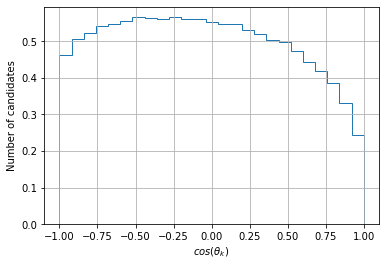

In [67]:
plt.hist(acceptance['costhetak'], bins=25, density = True, histtype = 'step')
plt.xlabel(r'$cos(\theta_k)$')
plt.ylabel(r'Number of candidates')
plt.grid()
plt.show()

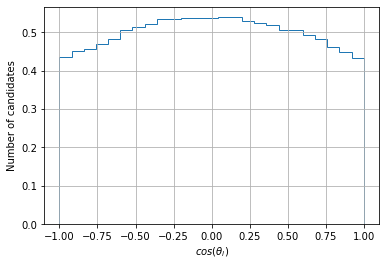

In [68]:
plt.hist(acceptance['costhetal'], bins=25, density = True, histtype = 'step')
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.grid()
plt.show()

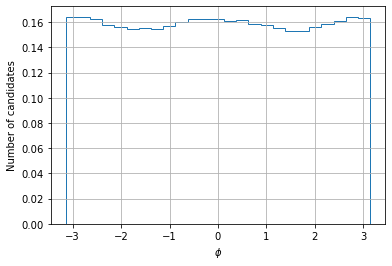

In [69]:
plt.hist(acceptance['phi'], bins = 25, density = True, histtype = 'step')
plt.xlabel(r'$\phi$')
plt.ylabel(r'Number of candidates')
plt.grid()
plt.show()

In [70]:
# Load one of the toy data files
toy_data_bin_3 = pd.read_csv('toy_data_bin_0.csv')

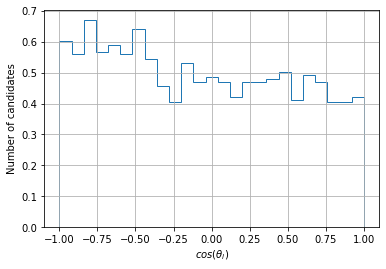

In [71]:
plt.hist(toy_data_bin_3['ctl'], bins = 25, density = True, histtype = 'step')
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.grid()
plt.show()

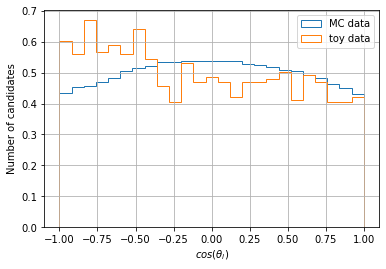

In [72]:
# Compare the plot for cos(theta_l) for the acceptance_mc data and toy_data_bin_3

binh_mc_l, bine_mc_l, etc_mc_l = plt.hist(acceptance['costhetal'], bins=25, density = True, histtype = 'step', label = "MC data")
binh_3_l, bine_3_l, etc_3_l = plt.hist(toy_data_bin_3['ctl'], bins = 25, density = True, histtype = 'step', label = "toy data")
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'Number of candidates')
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, '$Acceptance$')

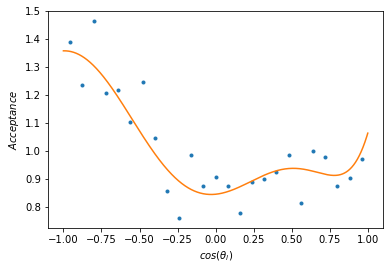

In [73]:
def ratio(a,b):
    return a/b

def acceptance_func(x,a,b,c,d,f,g,h):
    y = a*x**6 + b*x**5 + c*x**4 + d*x**3 + f*x**2 + g*x + h
    return y

def center_bins(bin_edge):
    bin_center = bin_edge[:-1] + (bin_edge[1] - bin_edge[0])/2
    return bin_center

binc_mc_l = center_bins(bine_mc_l)
bin_ratio_l = ratio(binh_3_l, binh_mc_l)

params_l, cov_l = op.curve_fit(acceptance_func, bine_mc_l[:-1], bin_ratio_l)

cos_theta_l = np.linspace(-1,1,100000)
acc_cos_theta_l = acceptance_func(cos_theta_l, *params_l)

plt.plot(binc_mc_l, bin_ratio_l, '.')
plt.plot(cos_theta_l, acc_cos_theta_l)
plt.xlabel(r'$cos(\theta_l)$')
plt.ylabel(r'$Acceptance$')


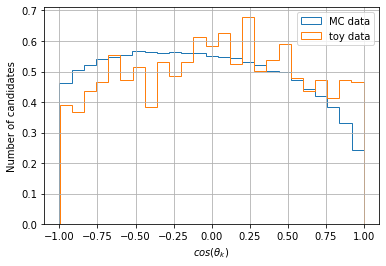

In [74]:
# Repeat for cos(theta_k) 

binh_mc_k, bine_mc_k, etc_mc_k = plt.hist(acceptance['costhetak'], bins=25, density = True, histtype = 'step', label = "MC data")
binh_3_k, bine_3_k, etc_3_k = plt.hist(toy_data_bin_3['ctk'], bins = 25, density = True, histtype = 'step', label = "toy data")
plt.xlabel(r'$cos(\theta_k)$')
plt.ylabel(r'Number of candidates')
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, '$Acceptance$')

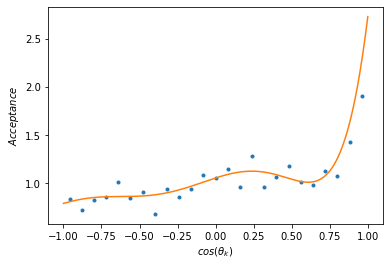

In [75]:
binc_mc_k = center_bins(bine_mc_k)
bin_ratio_k = ratio(binh_3_k, binh_mc_k)

params_k, cov_k = op.curve_fit(acceptance_func, bine_mc_k[:-1], bin_ratio_k)

cos_theta_k = np.linspace(-1,1,100000)
acc_cos_theta_k = acceptance_func(cos_theta_k, *params_k)

plt.plot(binc_mc_k, bin_ratio_k, '.')
plt.plot(cos_theta_k, acc_cos_theta_k)
plt.xlabel(r'$cos(\theta_k)$')
plt.ylabel(r'$Acceptance$')

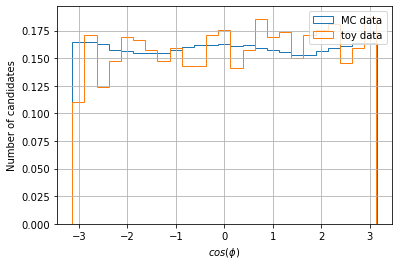

In [76]:
# Repeat for phi

binh_mc_p, bine_mc_p, etc_mc_p = plt.hist(acceptance['phi'], bins=25, density = True, histtype = 'step', label = "MC data")
binh_3_p, bine_3_p, etc_3_p = plt.hist(toy_data_bin_3['phi'], bins = 25, density = True, histtype = 'step', label = "toy data")
plt.xlabel(r'$cos(\phi)$')
plt.ylabel(r'Number of candidates')
plt.legend()
plt.grid()
plt.show()

Text(0, 0.5, '$Acceptance$')

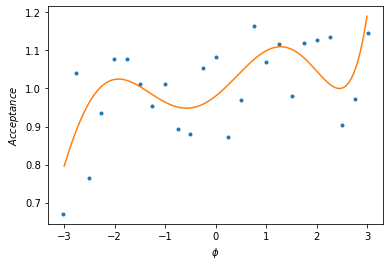

In [77]:
binc_mc_p = center_bins(bine_mc_p)
bin_ratio_p = ratio(binh_3_p, binh_mc_p)

params_p, cov_p = op.curve_fit(acceptance_func, bine_mc_p[:-1], bin_ratio_p)

phi = np.linspace(-3,3,100000)
acc_phi = acceptance_func(phi, *params_p)

plt.plot(binc_mc_p, bin_ratio_p, '.')
plt.plot(phi, acc_phi)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$Acceptance$')

In [ ]:
# normalise the scalar array
# normalised scalar array = scalar_array * acceptance_function * normalisation_factor